In [26]:
#Імпорт необхідних бібліотек
import numpy as nmp
import pandas as pnd
import matplotlib.pyplot as ppl
import tensorflow as tf

from sklearn.model_selection import train_test_split as tts
from sklearn.datasets import make_regression as mkr
from tensorflow import keras as ks
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential as sql
from tensorflow.keras.layers import Dense as dn

Epoch 1/200
25/25 [==============================] - 1s 16ms/step - loss: 95.0028 - mae: 95.0028 - val_loss: 95.2625 - val_mae: 95.2625
Epoch 2/200
25/25 [==============================] - 0s 5ms/step - loss: 94.5209 - mae: 94.5209 - val_loss: 94.6666 - val_mae: 94.6666
Epoch 3/200
25/25 [==============================] - 0s 5ms/step - loss: 93.6877 - mae: 93.6877 - val_loss: 93.5370 - val_mae: 93.5370
Epoch 4/200
25/25 [==============================] - 0s 4ms/step - loss: 92.1437 - mae: 92.1437 - val_loss: 91.4008 - val_mae: 91.4008
Epoch 5/200
25/25 [==============================] - 0s 5ms/step - loss: 89.3469 - mae: 89.3469 - val_loss: 87.6122 - val_mae: 87.6122
Epoch 6/200
25/25 [==============================] - 0s 4ms/step - loss: 84.6161 - mae: 84.6161 - val_loss: 81.7023 - val_mae: 81.7023
Epoch 7/200
25/25 [==============================] - 0s 4ms/step - loss: 77.4345 - mae: 77.4345 - val_loss: 72.8495 - val_mae: 72.8495
Epoch 8/200
25/25 [==============================] - 0

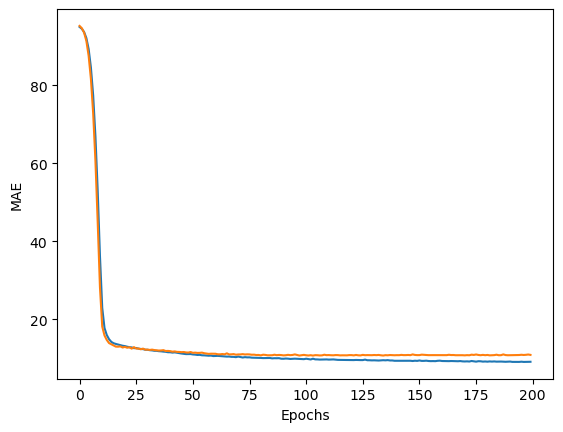

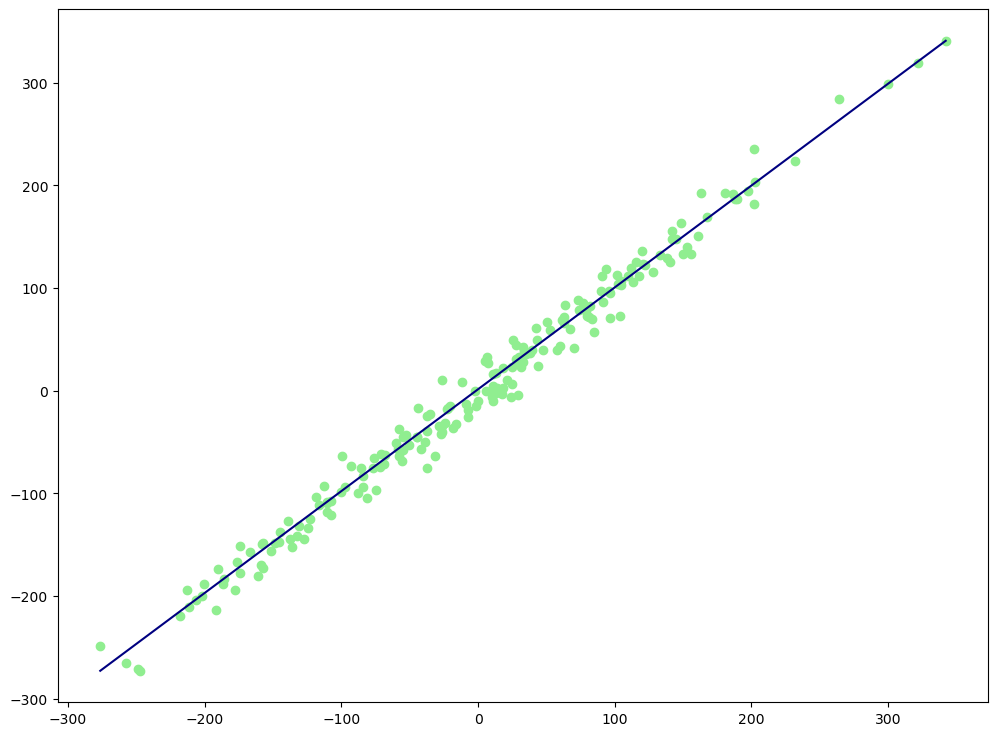

In [27]:
x1, y1 = mkr(n_samples=1000, n_features=7, n_informative=3, noise=13, random_state=3)
dat = pnd.DataFrame(x1, columns=['Feature {i+1}' for i in range(7)])
dat['Target'] = y1
dat.to_csv('Data.csv', index=False)
xtrain1, xtest1, ytrain1, ytest1 = tts(x1, y1, test_size=0.2, random_state=3)
md1 = sql([dn(64, activation='relu', input_shape=(x1.shape[1],)), dn(32, activation='relu'), dn(1)])
md1.compile(optimizer='adam', loss='mae', metrics=['mae'])
h1 = md1.fit(xtrain1, ytrain1, epochs=200, validation_data=(xtest1, ytest1))
pred1 = md1.predict(xtest1)
#Оцінка моделі 
print("Loss on training data:\n", md1.evaluate(xtrain1, ytrain1, verbose=0))
print("Loss on test data:\n", md1.evaluate(xtest1, ytest1, verbose=0))
#Візуалізація
ppl.plot(h1.history['loss'], label='Train loss')
ppl.plot(h1.history['val_loss'], label='Validation loss')
ppl.xlabel('Epochs')
ppl.ylabel('MAE')
ppl.figure(figsize=(12, 9))
ppl.scatter(ytest1, pred1, color='lightgreen')
ppl.plot([min(ytest1), max(ytest1)], [min(pred1), max(pred1)], linestyle='-', color='navy')
ppl.show(close=None, block=None)

Epoch 1/300
25/25 [==============================] - 1s 16ms/step - loss: 68.0409 - mae: 68.0409 - val_loss: 24.2571 - val_mae: 24.2571
Epoch 2/300
25/25 [==============================] - 0s 4ms/step - loss: 18.3761 - mae: 18.3761 - val_loss: 14.8225 - val_mae: 14.8225
Epoch 3/300
25/25 [==============================] - 0s 5ms/step - loss: 14.0733 - mae: 14.0733 - val_loss: 13.4811 - val_mae: 13.4811
Epoch 4/300
25/25 [==============================] - 0s 5ms/step - loss: 13.8627 - mae: 13.8627 - val_loss: 14.7102 - val_mae: 14.7102
Epoch 5/300
25/25 [==============================] - 0s 5ms/step - loss: 14.7263 - mae: 14.7263 - val_loss: 12.5533 - val_mae: 12.5533
Epoch 6/300
25/25 [==============================] - 0s 4ms/step - loss: 12.1463 - mae: 12.1463 - val_loss: 11.9321 - val_mae: 11.9321
Epoch 7/300
25/25 [==============================] - 0s 5ms/step - loss: 12.0353 - mae: 12.0353 - val_loss: 11.7652 - val_mae: 11.7652
Epoch 8/300
25/25 [==============================] - 0

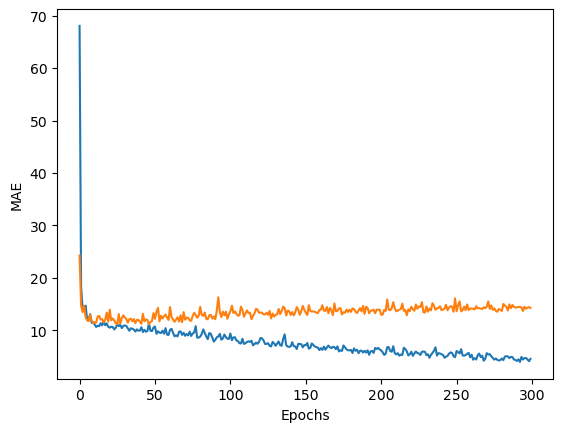

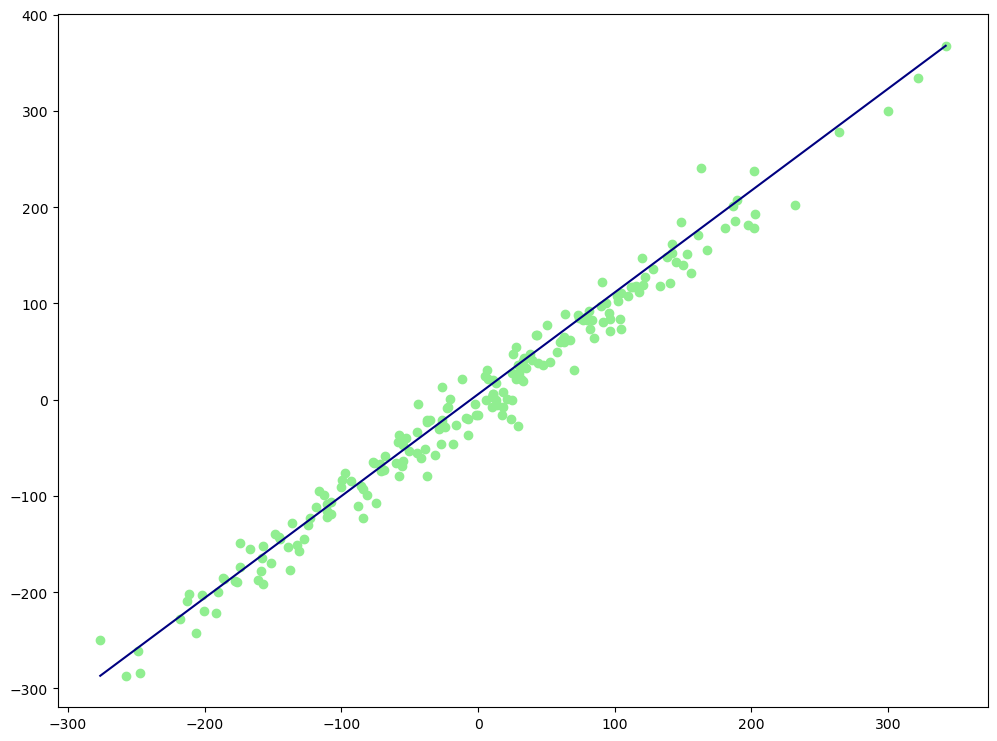

In [28]:
data = pnd.read_csv('Data.csv')
x2 = data.drop('Target', axis=1)
y2 = data['Target']
xtrain2, xtest2, ytrain2, ytest2 = tts(x2, y2, test_size=0.2, random_state=3)
md2 = sql([dn(128, activation='relu', input_shape=(x2.shape[1],)), dn(64, activation='relu'), dn(32, activation='relu'), dn(1)])
md2.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), loss='mae', metrics=['mae'])
h2 = md2.fit(xtrain2, ytrain2, epochs=300, validation_data=(xtest2, ytest2))
pred2 = md2.predict(xtest2)
#Оцінка моделі 
print("Loss on training data:\n", md2.evaluate(xtrain2, ytrain2, verbose=0))
print("Loss on test data:\n", md2.evaluate(xtest2, ytest2, verbose=0))
#Візуалізація
ppl.plot(h2.history['loss'], label='Train loss')
ppl.plot(h2.history['val_loss'], label='Validation loss')
ppl.xlabel('Epochs')
ppl.ylabel('MAE')
ppl.figure(figsize=(12, 9))
ppl.scatter(ytest2, pred2, color='lightgreen')
ppl.plot([min(ytest2), max(ytest2)], [min(pred2), max(pred2)], linestyle='-', color='navy')
ppl.show(close=None, block=None)

Learning_rate (default value 0.001) indicates how big steps we are moving in the direction of minimizing the loss function during gradient descent. If we increase the learning_rate parameter by 10 times, it is possible to learn the model faster, but there is a possibility of missing minima, instabilities and overflows.
If we increase the duration of training from 200 to 300 epochs, the loss function may decrease and the accuracy on the training set may increase, but there is possibility of the risk of overtraining and the increase of the training time.